In [17]:
# For compatibility between Python 2 and Python 3
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# To Plot matplotlib figures inline on the notebook
%matplotlib inline


In [18]:
data = pd.read_csv('turnstile_180407.txt')
data.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

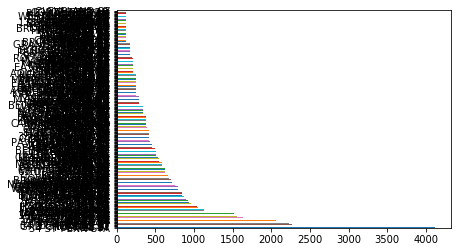

In [20]:
data.STATION.value_counts().plot(kind='barh')


In [5]:
stops = pd.read_csv('data/stops.txt')
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,101,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,1,NaN
1,101N,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
2,101S,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
3,103,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,1,NaN
4,103N,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,0,103


In [6]:
trips = pd.read_csv('data/trips.txt')
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,GS,A20171105SAT,A20171105SAT_036000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R
1,GS,A20171105SAT,A20171105SAT_036400_GS.S01R,GRAND CENTRAL - 42 ST,1,NaN,GS.S01R
2,GS,A20171105SAT,A20171105SAT_037000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R
3,GS,A20171105SAT,A20171105SAT_037400_GS.S01R,GRAND CENTRAL - 42 ST,1,NaN,GS.S01R
4,GS,A20171105SAT,A20171105SAT_038000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R


In [7]:
routes = pd.read_csv('data/routes.txt')
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,MTA NYCT,1,Broadway - 7 Avenue Local,Trains operate between 242 St in the Bronx and...,1,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,NaN
1,2,MTA NYCT,2,7 Avenue Express,"Trains operate between Wakefield-241 St, Bronx...",1,http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,
2,3,MTA NYCT,3,7 Avenue Express,"Trains operate between 148 St, 7 Av, Manhattan...",1,http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,NaN
3,4,MTA NYCT,4,Lexington Avenue Express,Trains operate daily between Woodlawn/Jerome A...,1,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,NaN
4,5,MTA NYCT,5,Lexington Avenue Express,"Weekdays daytime, most trains operate between ...",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,NaN
